In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2024-06-13 13:03:05.462366: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
# Define constants
BATCH_SIZE = 48
IMG_SIZE = 32
NUM_CLASSES = 10  # Number of classes to identify
NUM_EPOCHS = 30
LEARNING_RATE = 0.001
DROPOUT_RATES = [0.3, 0.5, 0.5]

In [3]:
# Define directories
train_dirs = ['./dataset/train/train1', './dataset/train/train2', './dataset/train/train3', './dataset/train/train5']
validation_dir = './dataset/validation'
test_dir = './dataset/test'

In [4]:
# Create image data generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Create multiple train generators
train_generators = [train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical') for train_dir in train_dirs]

# Custom generator to merge multiple directories
def combined_generator(generators):
    while True:
        for generator in generators:
            yield next(generator)

train_generator = combined_generator(train_generators)

# Validation and test generators
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical')

Found 10000 images belonging to 10 classes.
Found 10000 images belonging to 10 classes.
Found 10000 images belonging to 10 classes.
Found 10000 images belonging to 10 classes.
Found 10000 images belonging to 10 classes.
Found 10000 images belonging to 10 classes.


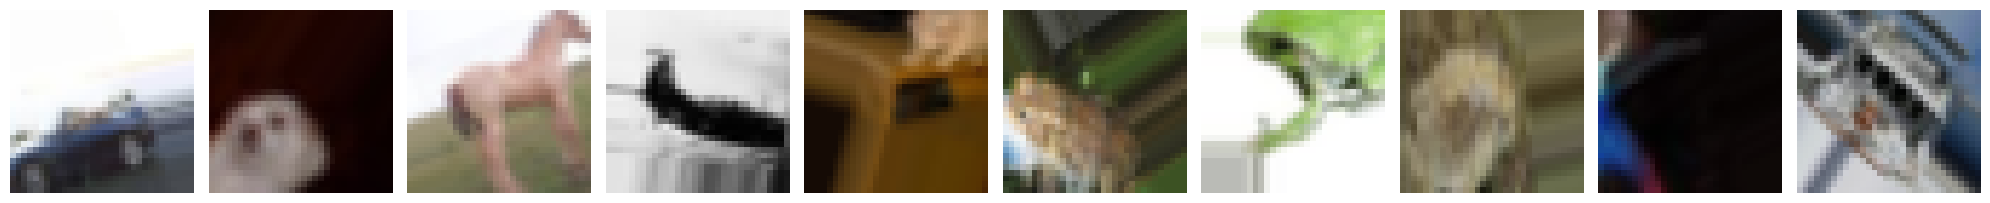

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(
2024-06-13 13:03:08.403823: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:282] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2024-06-13 13:03:08.403846: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:134] retrieving CUDA diagnostic information for host: 98db08751e78
2024-06-13 13:03:08.403852: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:141] hostname: 98db08751e78
2024-06-13 13:03:08.403921: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:165] libcuda reported version is: 550.67.0
2024-06-13 13:03:08.403937: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:169] kernel reported version is: 550.67.0
2

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 30, 30, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 13, 13, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 4, 4, 32)       │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 4, 4, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,362 (95.16 KB)

 Trainable params: 24,106 (94.16 KB)

 Non-trainable params: 256 (1.00 KB)

In [5]:
# Function to plot images
def plot_images(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    #plt.savefig('./plot.png')
    plt.show()

# Generate a batch of images and display them
sample_batch = next(train_generator)
plot_images(sample_batch[0][:10])# Define the model
model = Sequential([
    Conv2D(128, (3, 3), input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2, 2)),
    Dropout(DROPOUT_RATES[0]),
    
    Conv2D(256, (3, 3)),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2, 2)),
    Dropout(DROPOUT_RATES[1]),
    
    Conv2D(512, (3, 3)),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2, 2)),
    
    Flatten(),
    Dense(512),
    BatchNormalization(),
    Activation('relu'),
    Dropout(DROPOUT_RATES[2]),
    
    Dense(NUM_CLASSES, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=LEARNING_RATE),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

In [6]:
# Define callbacks
checkpoint = ModelCheckpoint("best_model.keras", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [7]:
# Calculate steps per epoch
steps_per_epoch = sum([gen.samples // BATCH_SIZE for gen in train_generators])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=NUM_EPOCHS,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE,
    callbacks=[checkpoint, early_stopping]
)

# Evaluate the model
loss, accuracy = model.evaluate(test_generator)
print("Test Accuracy:", accuracy)

Epoch 1/30
623/624 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.1814 - loss: 2.3051

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()



Epoch 1: val_accuracy improved from -inf to 0.25781, saving model to best_model.keras
624/624 ━━━━━━━━━━━━━━━━━━━━ 29s 44ms/step - accuracy: 0.1815 - loss: 2.3046 - val_accuracy: 0.2578 - val_loss: 2.0624
Epoch 2/30
624/624 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.2449 - loss: 2.0005
Epoch 2: val_accuracy did not improve from 0.25781
624/624 ━━━━━━━━━━━━━━━━━━━━ 26s 41ms/step - accuracy: 0.2449 - loss: 2.0005 - val_accuracy: 0.0625 - val_loss: 1.2412
Epoch 3/30
  3/624 ━━━━━━━━━━━━━━━━━━━━ 27s 44ms/step - accuracy: 0.2700 - loss: 1.9138

2024-06-13 13:04:03.399359: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/usr/lib/python3.11/contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


624/624 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.2772 - loss: 1.9426
Epoch 3: val_accuracy improved from 0.25781 to 0.29437, saving model to best_model.keras
624/624 ━━━━━━━━━━━━━━━━━━━━ 27s 44ms/step - accuracy: 0.2772 - loss: 1.9426 - val_accuracy: 0.2944 - val_loss: 1.8358
Epoch 4/30
624/624 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.2900 - loss: 1.9080
Epoch 4: val_accuracy improved from 0.29437 to 0.62500, saving model to best_model.keras
624/624 ━━━━━━━━━━━━━━━━━━━━ 25s 41ms/step - accuracy: 0.2900 - loss: 1.9080 - val_accuracy: 0.6250 - val_loss: 0.7031
Epoch 5/30
  3/624 ━━━━━━━━━━━━━━━━━━━━ 25s 41ms/step - accuracy: 0.3455 - loss: 1.8053

2024-06-13 13:04:56.015861: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


623/624 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.3050 - loss: 1.8649
Epoch 5: val_accuracy did not improve from 0.62500
624/624 ━━━━━━━━━━━━━━━━━━━━ 27s 44ms/step - accuracy: 0.3050 - loss: 1.8649 - val_accuracy: 0.3341 - val_loss: 1.8050
Epoch 6/30
624/624 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.3080 - loss: 1.8534
Epoch 6: val_accuracy did not improve from 0.62500
624/624 ━━━━━━━━━━━━━━━━━━━━ 25s 40ms/step - accuracy: 0.3080 - loss: 1.8534 - val_accuracy: 0.3750 - val_loss: 0.8164
Epoch 7/30
  3/624 ━━━━━━━━━━━━━━━━━━━━ 27s 44ms/step - accuracy: 0.3273 - loss: 1.7079

2024-06-13 13:05:48.564052: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


624/624 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.3196 - loss: 1.8348
Epoch 7: val_accuracy did not improve from 0.62500
624/624 ━━━━━━━━━━━━━━━━━━━━ 28s 44ms/step - accuracy: 0.3196 - loss: 1.8348 - val_accuracy: 0.2874 - val_loss: 1.9417
Epoch 8/30
624/624 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.3157 - loss: 1.8236
Epoch 8: val_accuracy did not improve from 0.62500
624/624 ━━━━━━━━━━━━━━━━━━━━ 25s 40ms/step - accuracy: 0.3157 - loss: 1.8236 - val_accuracy: 0.1875 - val_loss: 1.1187
Epoch 9/30
  3/624 ━━━━━━━━━━━━━━━━━━━━ 25s 41ms/step - accuracy: 0.2847 - loss: 1.9548

2024-06-13 13:06:41.044318: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


623/624 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.3288 - loss: 1.8151
Epoch 9: val_accuracy did not improve from 0.62500
624/624 ━━━━━━━━━━━━━━━━━━━━ 28s 45ms/step - accuracy: 0.3288 - loss: 1.8150 - val_accuracy: 0.3835 - val_loss: 1.6265
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.3661 - loss: 1.7681
Test Accuracy: 0.36809998750686646


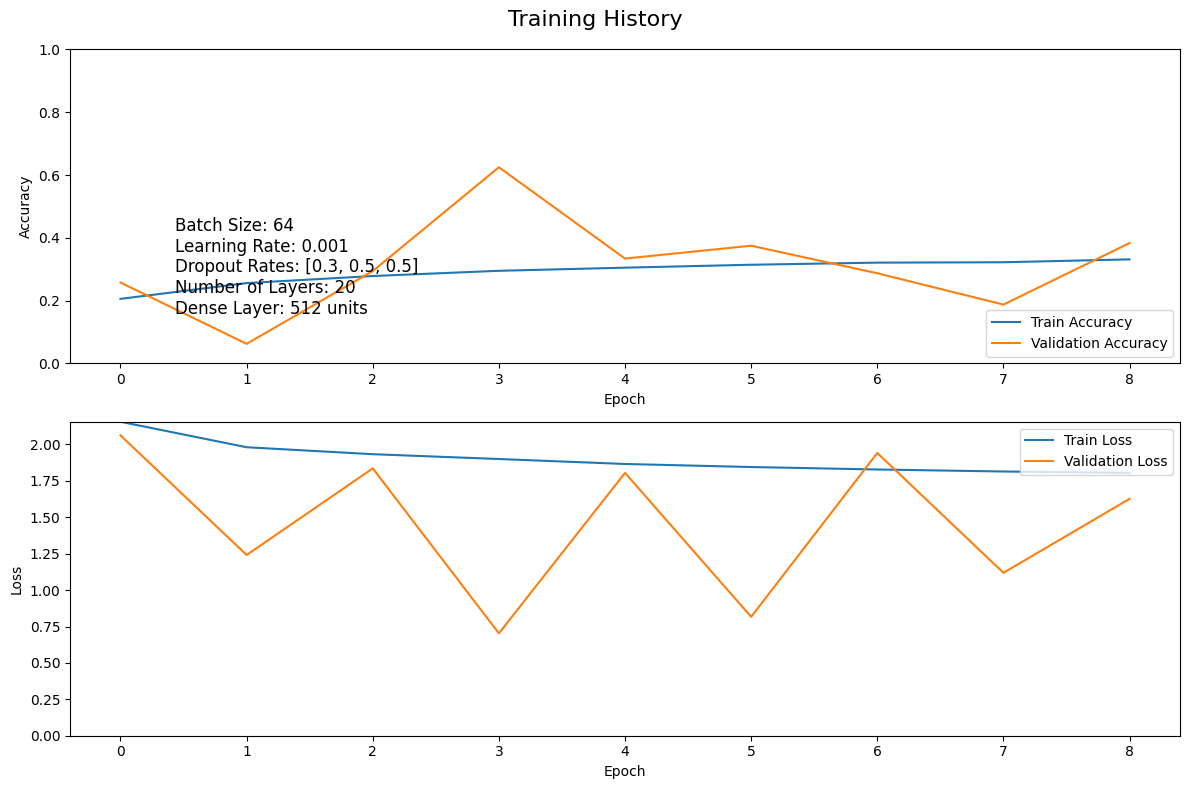

157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.3642 - loss: 1.7812
Test Accuracy: 0.36809998750686646


In [8]:
# Save the plot of training history
def plot_training_history(history, batch_size, output_base_dir='./plots'):
    output_dir = f"{output_base_dir}/batch_size_{batch_size}"
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    plt.figure(figsize=(12, 8))
    
    # Plot accuracy
    plt.subplot(2, 1, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0, 1])
    plt.legend(loc='lower right')
    
    # Plot loss
    plt.subplot(2, 1, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.ylim([0, max(history.history['loss'])])
    plt.legend(loc='upper right')

    # Add titles and text box with parameters
    plt.suptitle('Training History', fontsize=16)
    textstr = '\n'.join((
        f'Batch Size: {batch_size}',
        f'Learning Rate: {LEARNING_RATE}',
        f'Dropout Rates: {DROPOUT_RATES}',
        f'Number of Layers: {len(model.layers)}',
        f'Dense Layer: 512 units'))
    
    plt.gcf().text(0.15, 0.6, textstr, fontsize=12)
    
    # Save the plot
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, 'training_history.png'))
    plt.show()

# Plot and save the training history
plot_training_history(history, BATCH_SIZE)

# Evaluate the model
loss, accuracy = model.evaluate(test_generator)
print("Test Accuracy:", accuracy)